alpha = 0.9816207940789846
beta  = 0.9466688004339952
gamma = 1.0122845673923717
delta = 1.0750651128386293


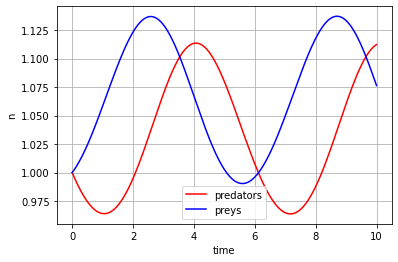

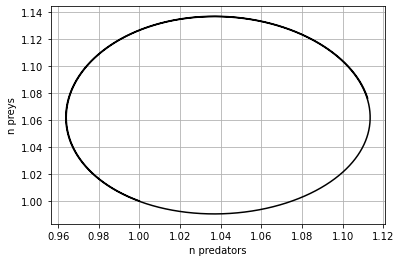

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import fsolve, minimize 


class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()

def solve(coefficients):
    alpha, beta, gamma, delta = coefficients   
    x_0 = 1
    y_0 = 1
    # Условия равновесия системы
    x_st = gamma / delta
    y_st = alpha / beta
    # Из математической модели Лотки-Вольтерры с помощью математических преобразований
    c = beta * y_0 + delta * x_0 - alpha * np.log(np.abs(y_0)) - gamma * np.log(np.abs(x_0))
    # Определение пиковых значений численности жертв и хищников
    def f_x(x):
        return beta * y_st + delta * x - alpha * np.log(np.abs(y_st)) - gamma * np.log(np.abs(x)) - c
    
    def f_y(y):
        return beta * y + delta * x_st - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x_st)) - c

    x_min = fsolve(f_x, 0.001)
    y_min = fsolve(f_y, 0.001)
    
    return np.abs(y_min / x_min - 1.1)
    
def main():
    x_0 = 1
    y_0 = 1
    find_coefficients = minimize(solve, [1, 1, 1, 1])
    alpha, beta, gamma, delta = find_coefficients.x
    print("alpha = {}".format(alpha))
    print("beta  = {}".format(beta))
    print("gamma = {}".format(gamma))
    print("delta = {}".format(delta))
    biome = Biome(pred_init = y_0, prey_init = x_0, tmax = 10, dt = 0.001)
    biome.run(alpha, beta, gamma, delta)
    biome.plot()
    biome.plot_cycle()

if __name__ == "__main__":
    main()
